 ## API 사용방법
 
#### estimator API
    
 1. 적절한 estimator클래스 import 해서 모델의 클래스 선택
 
 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
 
 3. 데이터를 특징 배열과 대상 벡터로 배치
 
 4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
 
 5. 모델을 새 데이터에 적용

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

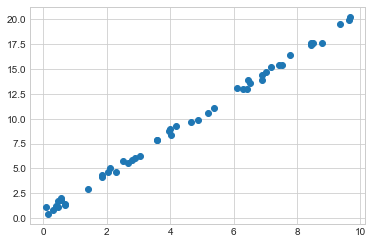

In [19]:
x=10*np.random.rand(50)
y=2*x+np.random.rand(50)
plt.scatter(x,y)

In [26]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

In [27]:
#2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택

model=LinearRegression(fit_intercept=True)

In [4]:
model?

In [22]:
#3. 데이터를 특징 배열과 대상 벡터로 배치

X=x[:,np.newaxis]
X

In [29]:
#4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합

model.fit(X,y)

LinearRegression()

In [30]:
#5. 모델을 새 데이터에 적용

xfit=np.linspace(-1,11)
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)

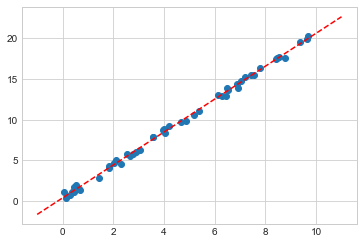

In [31]:
plt.scatter(x,y)
plt.plot(xfit,yfit,'--r')

# 예제 데이터 세트

* 일반적으로 딕셔너리 형태로 구성

* data: 특징 데이터 세트

* target: 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터

* target_names: 개별 레이블의 이름(분류용)

* feature_names: 특징이름

* DESCR: 데이터 세트에 대한 설명과 각 특징 설명

In [32]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [33]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [35]:
diabetes.data.shape

(442, 10)

In [36]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# model_selection module

* 학습용 데이터와 테스트 데이터로 분리

* 교차 검증 분할 및 평가

* Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

### train_test_split():학습/테스트 데이터 세트 분리

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

X_train, X_test, y_train, y_test=train_test_split(diabetes.data, diabetes.target, test_size=0.3)

model=LinearRegression()
model.fit(X_train, y_train)

print('학습데이터 점수:{}'.format(model.score(X_train,y_train)))
print('평가데이터 점수:{}'.format(model.score(X_test,y_test)))

학습데이터 점수:0.5282137017815063
평가데이터 점수:0.4660527941184155


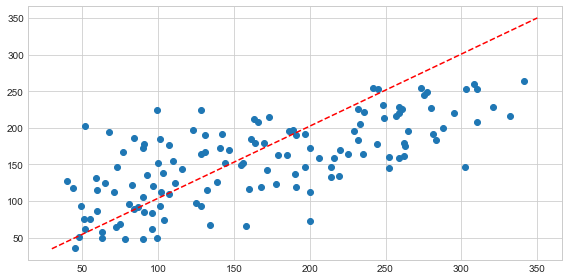

In [49]:
import matplotlib.pyplot as plt

predicted=model.predict(X_test)
expected=y_test
plt.figure(figsize=(8,4))
plt.scatter(expected,predicted)
plt.plot([30,350],[35,350],'--r')
plt.tight_layout()

### Cross-validation: evaluating estimator performance


* Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting


* “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set

* However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.


In [57]:
from sklearn.model_selection import cross_val_score, cross_validate

scores=cross_val_score(model,diabetes.data,diabetes.target, cv=5)

print('교차 검증 정확도:{}'.format(scores))
print('교차 검증 정확도:{}+/-{}'.format(np.mean(scores),np.std(scores)))

교차 검증 정확도:[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도:0.4823181221114939+/-0.04926619776563216


### GridSearchCV: 교차 검증과 최적 하이퍼 파라미터 찾기

* 훈련단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제

* 다양한 모델의 훈련과정을 자동화하고, 교차검사를 사용해 최적 값을 제공하는 도구 필요

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha=[0.001,0.01,0.1,1,10,100,1000]
param_grid=dict(alpha=alpha)

gs=GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result=gs.fit(diabetes.data, diabetes.target)


print('최적 점수:{}'.format(result.best_score_))
print('최적 파라미터'.format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)


최적 점수:0.4633240541517594
최적 파라미터
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003097,0.006298,0.000598,0.000488,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.001094,0.000699,0.000599,0.000489,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.001099,0.000299,0.000597,0.000488,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.001292,0.000460,0.000603,0.000492,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000898,0.000537,0.000698,0.000457,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000897,0.000299,0.000399,0.000488,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000998,0.000631,0.000698,0.000457,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7
